# Neural Networks Sprint Challenge

## 1) Define the following terms:

- Neuron - Adjustable weights for inputs and an activation function for it's output
- Input Layer - Layer that has weighted input data for inputs
- Hidden Layer - Neither the Input or Output layers, in between them
- Output Layer - Weighting inputs from previous layer, returns the result of the neural net
- Activation - Determines the output of the weighted inputs
- Backpropagation - adjusting weights to make better predictions starting with the Output Layer and going to the Input layer

 YOUR ANSWER HERE

## 2) Create a perceptron class that can model the behavior of an AND gate. You can use the following table as your training data:

| x1 | x2 | x3 | y |
|----|----|----|---|
| 1  | 1  | 1  | 1 |
| 1  | 0  | 1  | 0 |
| 0  | 1  | 1  | 0 |
| 0  | 0  | 1  | 0 |

In [12]:
%matplotlib inline

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from functools import reduce
import requests
from sklearn.preprocessing import StandardScaler
from scipy import optimize

In [14]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))
def sigmoid_derivative(x):
    return sigmoid(x) * (1 - sigmoid(x))

In [15]:
class Perceptron_AND(object):
    def __init__(self, rate=0.01, niter=10):
        self.rate = rate
        self.niter = niter
        
    def fit(self, X, y):
        self.weight = np.zeros(X.shape[1])
        self.errors = []
        self.pa = []
        min_y = 0.2
        for i in range(self.niter):

                  # Weighted sum of inputs and weights
            weighted_sum = self.net_input(X)

            # Activate with sigmoid function
            activated_output = sigmoid(weighted_sum)

            predicty = np.array([1 if a >= min_y else 0 for a in activated_output])
            
            # Calculate Error   
            error = y - predicty
            err = reduce((lambda sum_,e: sum_ + int(e != 0)),error,0)                    
            self.errors.append(err)

            # Calculate weight adjustments with sigmoid_derivative
            adjustments = self.rate * error * sigmoid_derivative(activated_output)

            # Update weights
            self.weight += np.dot(X.T, adjustments)                    
            self.pa.append(predicty)

        print('weights', self.weight)
        return self

    def net_input(self, X):
        return np.dot(X, self.weight)   
    
    def predict(self, X):
        return np.where(self.net_input(X) >= min_y, 1, 0)

In [16]:
X = np.array([[1, 1, 1, 1],
              [1, 0, 1, 0],
              [0, 1, 1, 0],
              [0, 0, 1, 0]])
y = [1, 0, 0, 0]

weights [-0.14009505 -0.14009505 -1.40790354  0.32218799]


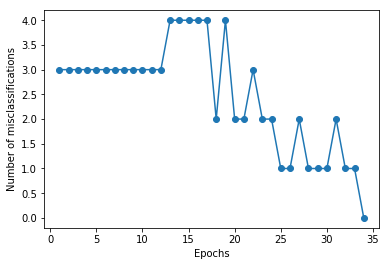

In [17]:
pn = Perceptron_AND(0.1, 34)
pn.fit(X, y)
plt.plot(range(1, len(pn.errors) + 1), pn.errors, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of misclassifications')
plt.show()

In [18]:
print(min(pn.errors))
index = min(range(len(pn.errors)), key=pn.errors.__getitem__)
index

0


33

In [19]:
confusion_matrix(y, pn.pa[index])

array([[3, 0],
       [0, 1]])

## 3) Implement a Neural Network Multilayer Perceptron class that uses backpropagation to update the network's weights. 
- Your network must have one hidden layer. 
- You do not have to update weights via gradient descent. You can use something like the derivative of the sigmoid function to update weights.
- Train your model on the Heart Disease dataset from UCI:

[Github Dataset](https://github.com/ryanleeallred/datasets/blob/master/heart.csv)

[Raw File on Github](https://raw.githubusercontent.com/ryanleeallred/datasets/master/heart.csv)


In [20]:
url="https://raw.githubusercontent.com/ryanleeallred/datasets/master/heart.csv"
df = pd.read_csv(url)

In [21]:
# df.tail(1000)

In [64]:
X = StandardScaler().fit_transform(df.drop('target', axis=1))
y = df.target.values

/home/mark/anaconda3/envs/myf/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/mark/anaconda3/envs/myf/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [23]:
X.shape,y.shape,type(X),type(y)

((303, 13), (303, 1), numpy.ndarray, numpy.ndarray)

In [24]:
df.target.unique()

array([1, 0])

In [26]:
class Neural_Network(object):
    def __init__(self):
        self.inputs = X.shape[1]
        self.hiddenNodes = 3
        self.outputNodes = 1
        self.L1_weights = np.random.randn(self.inputs, self.hiddenNodes) # (2x3)
        self.L2_weights = np.random.randn(self.hiddenNodes, self.outputNodes) # (3x1)
        self.min_y = 0.1
    def feed_forward(self, X):
        # Weighted sum between inputs and hidden layer
        self.hidden_sum = np.dot(X, self.L1_weights)
        # Activations of weighted sum
        self.activated_hidden = self.sigmoid(self.hidden_sum)
        # Weighted sum between hidden and output
        self.output_sum = np.dot(self.activated_hidden, self.L2_weights)
        # final activation of output
        self.activated_output = self.sigmoid(self.output_sum)
#         print('ot',self.activated_output.shape)
        nd = np.ndarray((X.shape[0],1), dtype=int)
        for i,x in enumerate(self.activated_output):
            nd[i] = 1 if x > self.min_y else 0
        return nd

    def sigmoid(self, s):
        return 1/(1+np.exp(-s))        
    
    def sigmoidPrime(self,z):
        #Gradient of sigmoid
        return np.exp(-z)/((1+np.exp(-z))**2)
    
    def backward(self, X, y, o):
        # backward propgate through the network
        self.o_error = y - o # error in output
        self.o_delta = self.o_error*self.sigmoidPrime(o) # applying derivative of sigmoid to error

        self.z2_error = self.o_delta.dot(self.L2_weights.T) # z2 error: how much our hidden layer weights contributed to output error
        self.z2_delta = self.z2_error*self.sigmoidPrime(self.activated_hidden) # applying derivative of sigmoid to z2 error

        self.L1_weights += X.T.dot(self.z2_delta) # adjusting first set (input --> hidden) weights
        self.L2_weights += self.activated_hidden.T.dot(self.o_delta) # adjusting second set (hidden --> output) weights

    def train (self, X, y):
        o = self.feed_forward(X)
        self.backward(X, y, o)  

In [27]:
NN = Neural_Network()
output = NN.feed_forward(X[0:3])
print("output: ", output)
print(X[0:4])

output:  [[1]
 [1]
 [1]]
[[ 0.9521966   0.68100522  1.97312292  0.76395577 -0.25633371  2.394438
  -1.00583187  0.01544279 -0.69663055  1.08733806 -2.27457861 -0.71442887
  -2.14887271]
 [-1.91531289  0.68100522  1.00257707 -0.09273778  0.07219949 -0.41763453
   0.89896224  1.63347147 -0.69663055  2.12257273 -2.27457861 -0.71442887
  -0.51292188]
 [-1.47415758 -1.46841752  0.03203122 -0.09273778 -0.81677269 -0.41763453
  -1.00583187  0.97751389 -0.69663055  0.31091206  0.97635214 -0.71442887
  -0.51292188]
 [ 0.18017482  0.68100522  0.03203122 -0.66386682 -0.19835726 -0.41763453
   0.89896224  1.23989692 -0.69663055 -0.20670527  0.97635214 -0.71442887
  -0.51292188]]


In [28]:
NN = Neural_Network()
for i in range(1000): # trains the NN 1,000 times
    if i+1 in [1,2,3,4,5] or (i+1) % 50 == 0:
        print('+---------- EPOCH', i+1, '-----------+')
#         print("Input: \n", X) 
#         print("Actual Output: \n", y)  
#         print("Predicted Output: \n" + str(NN.feed_forward(X))) 
        print("Loss: \n" + str(np.mean(np.square(y - NN.feed_forward(X))))) # mean sum squared loss
        print("\n")
    NN.train(X, y)

+---------- EPOCH 1 -----------+
Loss: 
0.45544554455445546


+---------- EPOCH 2 -----------+
Loss: 
0.5313531353135313


+---------- EPOCH 3 -----------+
Loss: 
0.46864686468646866


+---------- EPOCH 4 -----------+
Loss: 
0.16831683168316833


+---------- EPOCH 5 -----------+
Loss: 
0.1617161716171617


+---------- EPOCH 50 -----------+
Loss: 
0.17491749174917492


+---------- EPOCH 100 -----------+
Loss: 
0.45544554455445546


+---------- EPOCH 150 -----------+
Loss: 
0.1782178217821782


+---------- EPOCH 200 -----------+
Loss: 
0.1419141914191419


+---------- EPOCH 250 -----------+
Loss: 
0.15841584158415842


+---------- EPOCH 300 -----------+
Loss: 
0.44554455445544555


+---------- EPOCH 350 -----------+
Loss: 
0.13861386138613863


+---------- EPOCH 400 -----------+
Loss: 
0.15841584158415842


+---------- EPOCH 450 -----------+
Loss: 
0.49834983498349833


+---------- EPOCH 500 -----------+
Loss: 
0.16831683168316833


+---------- EPOCH 550 -----------+
Loss: 
0.14191419141

## 4) Implement a Multilayer Perceptron architecture of your choosing using the Keras library. Train your model and report its baseline accuracy. Then hyperparameter tune at least two parameters and report your model's accuracy. 

- Use the Heart Disease Dataset (binary classification)
- Use an appropriate loss function for a binary classification task
- Use an appropriate activation function on the final layer of your network. 
- Train your model using verbose output for ease of grading.
- Use GridSearchCV to hyperparameter tune your model. (for at least two hyperparameters)
- When hyperparameter tuning, show you work by adding code cells for each new experiment. 
- Report the accuracy for each combination of hyperparameters as you test them so that we can easily see which resulted in the highest accuracy.
- You must hyperparameter tune at least 5 parameters in order to get a 3 on this section.

In [87]:
from keras.models import Sequential
from keras.layers import Dense
from keras import optimizers
import numpy
# fix random seed for reproducibility
numpy.random.seed(42)
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from keras.callbacks import ReduceLROnPlateau
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier

In [88]:
X.shape,y.shape,type(X),type(y)

((303, 13), (303,), numpy.ndarray, numpy.ndarray)

In [105]:
opt = optimizers.adam(lr=0.1)

In [90]:
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2,
                              patience=5, min_lr=0.001)

In [198]:
# Important Hyperparameters
inputs = X.shape[1]
epochs = 50
batch_size = 10

def create_model(shape=15):
    # Create Model
    model = Sequential()
    model.add(Dense(3, activation='relu', input_shape=(shape,)))
    model.add(Dense(2, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    # Compile Model  
    model.compile(optimizer=optimizers.adam(lr=0.1), loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [192]:
model = create_model(X.shape[1])
# Fit Model
history = model.fit(X, y, validation_split=0.20, epochs=epochs,
                    batch_size=batch_size, verbose=0, callbacks=[reduce_lr])

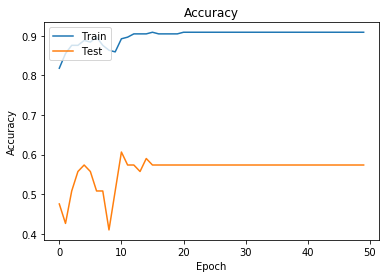

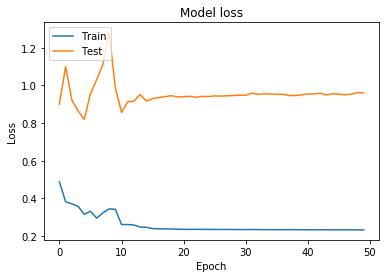

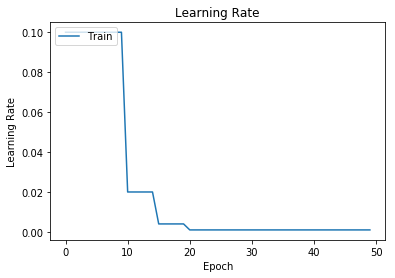

In [194]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

plt.plot(history.history['lr'])
plt.title('Learning Rate')
plt.ylabel('Learning Rate')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper left')
plt.show()

In [195]:
history.history['val_acc'][-1], history.history['acc'][-1]

(0.5737705015745319, 0.9090909031797046)

In [196]:
X.shape

(303, 15)

In [211]:
Y = y
# create model
model = KerasClassifier(build_fn=create_model, verbose=0)
# define the grid search parameters
# batch_size = [10, 20, 40, 60, 80, 100]
# epochs = [20]
# param_grid = dict(batch_size=batch_size, epochs=epochs)

# define the grid search parameters
param_grid = {'batch_size': [40, 45, 50, 55, 60], 'epochs': [50]}

# Create Grid Search
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=1)
grid_result = grid.fit(X, Y)

In [212]:
# Report Results
print(f"Best: {grid_result.best_score_} using {grid_result.best_params_}")
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print(f"Means: {mean}, Stdev: {stdev} with: {param}") 

Best: 0.6798680046997448 using {'batch_size': 55, 'epochs': 50}
Means: 0.6633663388958858, Stdev: 0.18220691405165826 with: {'batch_size': 40, 'epochs': 50}
Means: 0.41254126681353, Stdev: 0.29794505898523155 with: {'batch_size': 45, 'epochs': 50}
Means: 0.6633663366336634, Stdev: 0.08517153290686233 with: {'batch_size': 50, 'epochs': 50}
Means: 0.6798680046997448, Stdev: 0.07511423884358648 with: {'batch_size': 55, 'epochs': 50}
Means: 0.6336633767625286, Stdev: 0.13010168180652432 with: {'batch_size': 60, 'epochs': 50}


In [223]:
# define the grid search parameters
activation = [
    'softmax', 'softplus', 'softsign', 'relu', 'tanh', 'sigmoid',
    'hard_sigmoid', 'linear'
]
param_grid = dict(activation=activation)


# Function to create model, required for KerasClassifier
def create_model(activation='relu'):
    # create model
    model = Sequential()
    model.add(Dense(15, input_dim=15, activation=activation))
    model.add(Dense(5, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    # Compile model
    model.compile(
        loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
    return model


# create model
model = KerasClassifier(
    build_fn=create_model, epochs=20, batch_size=60, verbose=0)

# Create Grid Search
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=1)
grid_result = grid.fit(X, Y)

# Report Results
print(f"Best: {grid_result.best_score_} using {grid_result.best_params_}")
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print(f"Means: {mean}, Stdev: {stdev} with: {param}")

Best: 0.6996699703408547 using {'activation': 'tanh'}
Means: 0.6435643505341936, Stdev: 0.11113832197555099 with: {'activation': 'softmax'}
Means: 0.6963696279148064, Stdev: 0.09576645001645688 with: {'activation': 'softplus'}
Means: 0.48514851288433514, Stdev: 0.34592119145880534 with: {'activation': 'softsign'}
Means: 0.6006600668918182, Stdev: 0.1684785340716263 with: {'activation': 'relu'}
Means: 0.6996699703408547, Stdev: 0.044523901162090346 with: {'activation': 'tanh'}
Means: 0.39273928061570273, Stdev: 0.31541902363702246 with: {'activation': 'sigmoid'}
Means: 0.26072606611566573, Stdev: 0.36872233876495875 with: {'activation': 'hard_sigmoid'}
Means: 0.6831683042419232, Stdev: 0.09531042230445236 with: {'activation': 'linear'}


In [226]:
def create_model(activation='relu'):
    # create model
    model = Sequential()
    model.add(Dense(15, input_dim=15, activation=activation))
    model.add(Dense(5, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    # Compile model
    model.compile(
        loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
    return model


# create model
model = KerasClassifier(
    build_fn=create_model, epochs=20, batch_size=60, verbose=0)

# Create Grid Search
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=1)
grid_result = grid.fit(X, Y)

# Report Results
print(f"Best: {grid_result.best_score_} using {grid_result.best_params_}")
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print(f"Means: {mean}, Stdev: {stdev} with: {param}")

Best: 0.6897689778812648 using {'activation': 'softsign'}
Means: 0.43564356482363376, Stdev: 0.312783546363225 with: {'activation': 'softmax'}
Means: 0.6270627111885021, Stdev: 0.12636429052709722 with: {'activation': 'softplus'}
Means: 0.6897689778812648, Stdev: 0.06584138203448132 with: {'activation': 'softsign'}
Means: 0.5280527996741505, Stdev: 0.17344796243182328 with: {'activation': 'relu'}
Means: 0.6831683117170931, Stdev: 0.10129378656626709 with: {'activation': 'tanh'}
Means: 0.587458749120385, Stdev: 0.16613482435190763 with: {'activation': 'sigmoid'}
Means: 0.6468646845998544, Stdev: 0.1253256485070655 with: {'activation': 'hard_sigmoid'}
Means: 0.669967000437255, Stdev: 0.05958901244856987 with: {'activation': 'linear'}


In [227]:
df = pd.read_csv(url)
X = StandardScaler().fit_transform(df.drop('target', axis=1))
y = df.target.values

/home/mark/anaconda3/envs/myf/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/mark/anaconda3/envs/myf/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [231]:
# Important Hyperparameters
inputs = X.shape[1]
epochs = 50
batch_size = 55
activation = "softsign"

def create_model(shape = inputs):
    # Create Model
    model = Sequential()
    model.add(Dense(15, activation=activation, input_shape=(shape,)))
    model.add(Dense(2, activation='relu'))
    model.add(Dense(1, activation="sigmoid"))
    # Compile Model  
    model.compile(optimizer=optimizers.adam(lr=0.1), loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [232]:
# model = KerasClassifier(build_fn=create_model, epochs=50, batch_size=20, verbose=1)
model = create_model()
history = model.fit(X, y, validation_split=0.20, epochs=epochs,
                    batch_size=batch_size, verbose=1, callbacks=[reduce_lr])

Train on 242 samples, validate on 61 samples
Epoch 1/50
242/242 [==============================] - 46s 190ms/step - loss: 0.5087 - acc: 0.6446 - val_loss: 1.2840 - val_acc: 0.0000e+00
Epoch 2/50
242/242 [==============================] - 0s 803us/step - loss: 0.4079 - acc: 0.7851 - val_loss: 1.0051 - val_acc: 0.6557
Epoch 3/50
242/242 [==============================] - 0s 783us/step - loss: 0.3239 - acc: 0.8843 - val_loss: 0.7279 - val_acc: 0.7049
Epoch 4/50
242/242 [==============================] - 0s 421us/step - loss: 0.2910 - acc: 0.9050 - val_loss: 0.7318 - val_acc: 0.7049
Epoch 5/50
242/242 [==============================] - 0s 391us/step - loss: 0.2495 - acc: 0.9091 - val_loss: 0.9050 - val_acc: 0.6721
Epoch 6/50
242/242 [==============================] - 0s 427us/step - loss: 0.2578 - acc: 0.8926 - val_loss: 0.9711 - val_acc: 0.6557
Epoch 7/50
242/242 [==============================] - 0s 386us/step - loss: 0.2333 - acc: 0.9132 - val_loss: 0.9015 - val_acc: 0.6885
Epoch 8/50
2

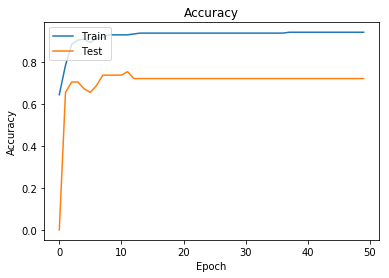

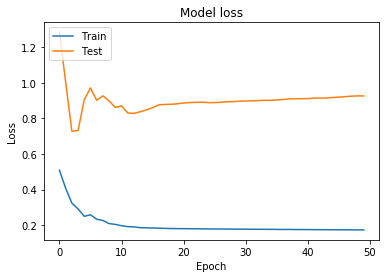

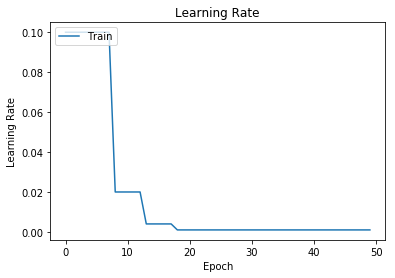

In [233]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

plt.plot(history.history['lr'])
plt.title('Learning Rate')
plt.ylabel('Learning Rate')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper left')
plt.show()

In [234]:
history.history.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc', 'lr'])

In [235]:
history.history['val_acc'][-1], history.history['acc'][-1], \
max(history.history['val_acc']), max(history.history['acc'])

(0.7213114793183374,
 0.9421487613157793,
 0.7540983508844845,
 0.9421487748622894)

In [236]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [237]:
df['Trestbps'] = df.trestbps.apply(lambda x: x // 10)
df['Age'] = df.trestbps.apply(lambda x: x // 10)

In [238]:
X = StandardScaler().fit_transform(df.drop(['target'], axis=1))
y = df.target.values

/home/mark/anaconda3/envs/myf/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/mark/anaconda3/envs/myf/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [239]:
model = create_model(X.shape[1])
history = model.fit(X, y, validation_split=0.20, epochs=epochs,
                    batch_size=batch_size, verbose=1, callbacks=[reduce_lr])

Train on 242 samples, validate on 61 samples
Epoch 1/50
242/242 [==============================] - 48s 199ms/step - loss: 0.5780 - acc: 0.7438 - val_loss: 0.6650 - val_acc: 0.6557
Epoch 2/50
242/242 [==============================] - 0s 963us/step - loss: 0.3231 - acc: 0.8884 - val_loss: 0.9395 - val_acc: 0.6721
Epoch 3/50
242/242 [==============================] - 0s 660us/step - loss: 0.2909 - acc: 0.8843 - val_loss: 1.0765 - val_acc: 0.5246
Epoch 4/50
242/242 [==============================] - 0s 449us/step - loss: 0.2648 - acc: 0.8967 - val_loss: 0.9920 - val_acc: 0.5574
Epoch 5/50
242/242 [==============================] - 0s 430us/step - loss: 0.2456 - acc: 0.9008 - val_loss: 0.9198 - val_acc: 0.6230
Epoch 6/50
242/242 [==============================] - 0s 466us/step - loss: 0.2263 - acc: 0.9132 - val_loss: 0.9329 - val_acc: 0.5738
Epoch 7/50
242/242 [==============================] - 0s 861us/step - loss: 0.2072 - acc: 0.9132 - val_loss: 0.9709 - val_acc: 0.5574
Epoch 8/50
242/2

In [240]:
history.history.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc', 'lr'])

In [246]:
history.history['val_acc'][-1], history.history['acc'][-1], \
max(history.history['val_acc']), max(history.history['acc'])

(0.47540984485970167,
 0.9380165284330194,
 0.6721311621978635,
 0.9380165419795297)

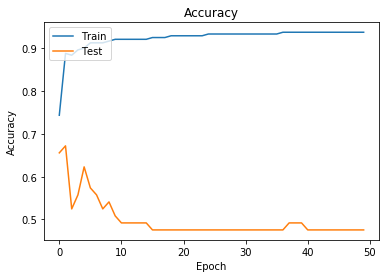

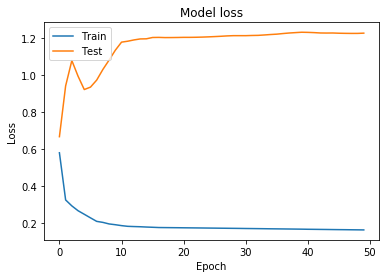

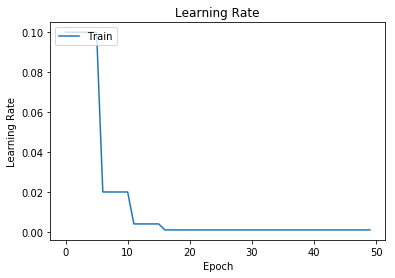

In [247]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

plt.plot(history.history['lr'])
plt.title('Learning Rate')
plt.ylabel('Learning Rate')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper left')
plt.show()

AttributeError: 'Adam' object has no attribute 'keys'